In [1]:
import nibabel as nib
import neuromaps.transforms as transforms

# 输入您的z map文件路径
control_all = '../results/mni152_to_fsaverage/control_all_z_size_level_thresh.nii'


In [2]:
import neuromaps.images as images
controls = images.load_nifti(control_all)

In [15]:
controls.files_types

(('image', '.nii'),)

In [18]:
controls_surf = transforms.mni152_to_fsaverage(control_all, '10k')

controls_surf 

(<nibabel.gifti.gifti.GiftiImage at 0x30a2e7680>,
 <nibabel.gifti.gifti.GiftiImage at 0x16d2b6db0>)

In [40]:
lh_data = controls_surf[0]
lh_data

In [42]:
rh_data = controls_surf[1]
rh_data

In [48]:
output_path = '../results/mni152_to_fsaverage/rh_data_output.gii'
nib.save(rh_data, output_path)

In [60]:
output_path2 = '../results/mni152_to_fsaverage/lh_data_output.gii'
nib.save(lh_data, output_path2)

In [44]:
from nilearn.datasets import load_fsaverage

fsaverage_meshes = load_fsaverage()

In [45]:
import numpy as np

from nilearn.datasets import load_fsaverage_data

curv_sign = load_fsaverage_data(data_type="curvature")
for hemi, data in curv_sign.data.parts.items():
    curv_sign.data.parts[hemi] = np.sign(data)

In [109]:

fsaverage_sulcal = load_fsaverage_data(data_type="sulcal", mesh_type="pial")

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_46115/92155525.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


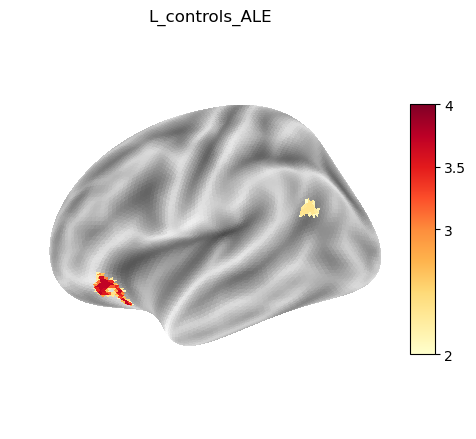

In [116]:
from nilearn.plotting import plot_surf_stat_map

# In this example we will only plot the right hemisphere
hemi = "left"

fig = plot_surf_stat_map(
    stat_map=output_path2,
    surf_mesh=fsaverage_meshes["inflated"],
    hemi=hemi,
    title="L_controls_ALE",
    colorbar=True,
    bg_map=fsaverage_sulcal,
    threshold=1.96,
    cmap='YlOrRd',
    vmin=2,
    vmax=4
)
fig.show()

/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_46115/267401841.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


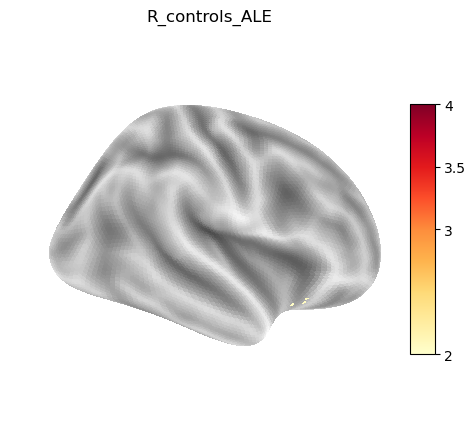

In [110]:
from nilearn.plotting import plot_surf_stat_map

# In this example we will only plot the right hemisphere
hemi = "right"

fig = plot_surf_stat_map(
    stat_map=output_path,
    surf_mesh=fsaverage_meshes["inflated"],
    hemi=hemi,
    title="R_controls_ALE",
    colorbar=True,
    bg_map=fsaverage_sulcal,
    threshold=1.96,
    cmap='YlOrRd',
    vmin=2,
    vmax=4
)
fig.show()


## 利用 surfplot 进行可视化 

In [3]:
import nilearn.plotting as plotting
import nilearn.image as image
import nilearn

# Data
nifti = nilearn.image.load_img(f"../results/ale/control_all_z_size_level_thresh.nii.gz")


[get_dataset_dir] Dataset found in /Users/ss/nilearn_data/fsaverage

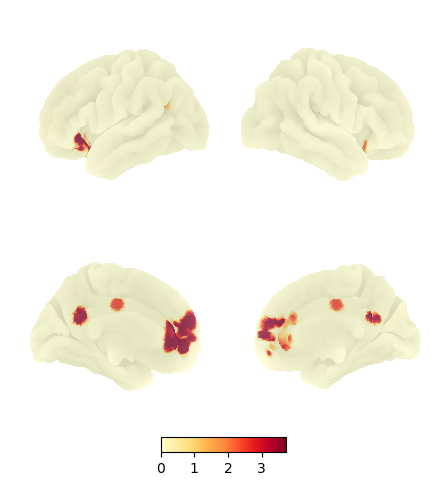

In [4]:
# Plot
fig, axes = plotting.plot_img_on_surf(nifti, surf_mesh="fsaverage",
                                      views=["lateral", "medial"],
                                      hemispheres=["left", "right"],
                                      inflate=False,
                                      colorbar=True,
                                      bg_on_data=True,
                                      cmap="YlOrRd")

In [5]:
import nibabel as nib
import neuromaps.transforms as transforms

# 输入您的z map文件路径
control_all = '../results/mni152_to_fsaverage/control_all_z_size_level_thresh.nii'


In [6]:
import neuromaps.images as images
controls = images.load_nifti(control_all)
controls.files_types
controls_surf = transforms.mni152_to_fslr(control_all, '32k')

controls_surf 


(<nibabel.gifti.gifti.GiftiImage at 0x32521a3f0>,
 <nibabel.gifti.gifti.GiftiImage at 0x306842870>)

In [7]:
controls_surf 

(<nibabel.gifti.gifti.GiftiImage at 0x32521a3f0>,
 <nibabel.gifti.gifti.GiftiImage at 0x306842870>)

In [8]:
lh_data = controls_surf[0]
lh_data
rh_data = controls_surf[1]
rh_data
output_path = '../results/mni152_to_fsaverage/rh_data.gii'
nib.save(rh_data, output_path)
output_path2 = '../results/mni152_to_fsaverage/lh_data.gii'
nib.save(lh_data, output_path2)

In [152]:
import nibabel as nib
import pyvista as pv
from surfplot import Plot

# 加载 .gii 文件
lh_data = nib.load('../results/mni152_to_fsaverage/lh_data.gii')  # 左半脑数据
rh_data = nib.load('../results/mni152_to_fsaverage/rh_data.gii')  # 右半脑数据

In [9]:
from surfplot import Plot
from surfplot.datasets import load_example_data
from neuromaps.datasets import fetch_fslr

surfaces = fetch_fslr()

p = Plot('../results/mni152_to_fsaverage/lh_data.gii', '../results/mni152_to_fsaverage/rh_data.gii')

/opt/anaconda3/lib/python3.12/site-packages/brainspace/plotting/base.py:40: UserWarning: Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.
  pn.extension('vtk')


2025-01-06 09:24:37.597 (   3.072s) [          21FF52] vtkPythonAlgorithm.cxx:97     ERR| vtkPythonAlgorithm (0x35c528330): Failure when calling method: "ProcessRequest":


IndexError: list index out of range

2025-01-06 09:24:37.657 (   3.132s) [          21FF52]       vtkExecutive.cxx:730    ERR| vtkCompositeDataPipeline (0x3639cfe70): Algorithm vtkPythonAlgorithm (0x35c528330) returned failure for request: vtkInformation (0x363954f50)
  Debug: Off
  Modified Time: 188
  Reference Count: 2
  Registered Events: (none)
  Request: REQUEST_DATA
  FROM_OUTPUT_PORT: 0
  ALGORITHM_AFTER_FORWARD: 1
  FORWARD_DIRECTION: 0


2025-01-06 09:24:37.658 (   3.133s) [          21FF52] vtkPythonAlgorithm.cxx:97     ERR| vtkPythonAlgorithm (0x370304ed0): Failure when calling method: "ProcessRequest":


IndexError: list index out of range

2025-01-06 09:24:37.669 (   3.144s) [          21FF52]       vtkExecutive.cxx:730    ERR| vtkCompositeDataPipeline (0x36be08ce0): Algorithm vtkPythonAlgorithm (0x370304ed0) returned failure for request: vtkInformation (0x36be0a080)
  Debug: Off
  Modified Time: 321
  Reference Count: 2
  Registered Events: (none)
  Request: REQUEST_DATA
  FROM_OUTPUT_PORT: 0
  ALGORITHM_AFTER_FORWARD: 1
  FORWARD_DIRECTION: 0




## surfplot 教程的代码

In [1]:
# Code source: Dan Gale
# License: BSD 3 clause

from surfplot import Plot
from surfplot.datasets import load_example_data
from neuromaps.datasets import fetch_fslr

surfaces = fetch_fslr()
lh, rh = surfaces['inflated']

p = Plot(lh, rh)

# shading
lh_sulc, rh_sulc = surfaces['sulc']
p.add_layer({'left': lh_sulc, 'right': rh_sulc}, cmap='binary_r', cbar=False)

color_range = (0, 12)


/opt/anaconda3/lib/python3.12/site-packages/brainspace/plotting/base.py:40: UserWarning: Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.
  pn.extension('vtk')


In [2]:

# comment: 用z map 叠加到大脑表面
# add default mode association stats
default = load_example_data(join=True)
p.add_layer(default, cmap='Blues_r', color_range=color_range,
            cbar_label='Default mode')


In [7]:
default

array([6.6808, 0.    , 0.    , ..., 0.    , 0.    , 0.    ])

In [13]:
print(default.shape)

(64984,)


In [15]:
import nibabel as nib

control_map = nib.load('../results/mni152_to_fsaverage/lh_data.gii')

In [21]:
control_map.print_summary()

----start----
Source filename:  None
Number of data arrays:  1
Version:  1.0
----
Metadata:
{}
None
----
Labeltable:
{}
None
----
DataArray 0:
Intent:  NIFTI_INTENT_SHAPE
DataType:  NIFTI_TYPE_FLOAT32
ArrayIndexingOrder:  RowMajorOrder
Dimensionality:  1
Dimensions:  [32492]
Encoding:  GZipBase64Binary
Endian:  LittleEndian
ExternalFileName:  
ExternalFileOffset:  0
----
Coordinate System:
Dataspace:  NIFTI_XFORM_UNKNOWN
XFormSpace:  NIFTI_XFORM_UNKNOWN
Affine Transformation Matrix:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
None
None
----end----


In [24]:
lh_data = lh_data.agg_data()

NameError: name 'lh_data' is not defined

: 

In [23]:
data_arrays = control_map.agg_data()

data_arrays 

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [17]:
control_map_array = control_map.darrays[0].data

In [19]:
print(control_map_array.shape)

(32492,)


In [ ]:
p.add_layer(control_map_array, cmap='Greens_r', color_range=color_range,
            cbar_label='Frontoparietal')

In [ ]:

# add frontoparietal assocation stats
fronto = load_example_data('frontoparietal', join=True)
p.add_layer(fronto, cmap='Greens_r', color_range=color_range,
            cbar_label='Frontoparietal')



/var/folders/yk/78rqxlxn4pz_rsb5_31xvh340000gn/T/ipykernel_70896/385616060.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


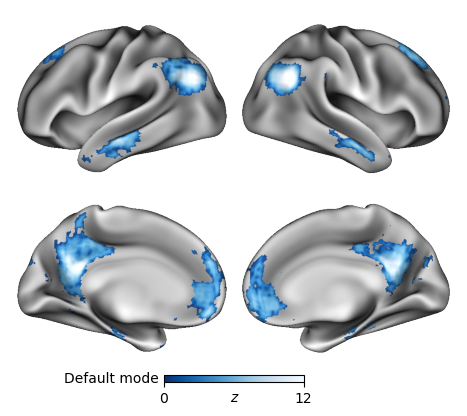

In [6]:

# create a clean looking set of colorbars. Only show labels for outer colorbar,
# given that both colorbars have the same range.
cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=0)
fig = p.build(cbar_kws=cbar_kws)
# add units to colorbar

fig.axes[1].set_xlabel('z', labelpad=-11, fontstyle='italic')
fig.show()
